In [1]:
#ejemplo
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('Acaponeta.TXT', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('Acaponeta.TXT', skiprows=4, sep='\s+')
# "Shift + Enter"

In [4]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,25/01/2018,22:00,183.0,339.0,0.95,25.9,23.5,65.0,1011.8,0.0,107.8
1,25/01/2018,23:00,148.0,349.0,5.39,18.7,23.9,64.0,1011.9,0.0,92.8
2,26/01/2018,00:00,86.0,9.0,6.27,14.8,23.9,60.0,1012.1,0.0,16.7
3,26/01/2018,01:00,54.0,7.0,6.24,16.6,23.3,60.0,1012.5,0.0,-1.0
4,26/01/2018,02:00,290.0,342.0,3.79,14.8,22.7,64.0,1012.8,0.0,-0.8


In [5]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [6]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS          float64
DIRR          float64
VELS          float64
VELR          float64
TEMP          float64
HR            float64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [7]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1))
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [8]:
df.head(14)

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,183.0,339.0,0.95,25.9,23.5,65.0,1011.8,0.0,107.8,2018-01-25 22:00:00
1,148.0,349.0,5.39,18.7,23.9,64.0,1011.9,0.0,92.8,2018-01-25 23:00:00
2,86.0,9.0,6.27,14.8,23.9,60.0,1012.1,0.0,16.7,2018-01-26 00:00:00
3,54.0,7.0,6.24,16.6,23.3,60.0,1012.5,0.0,-1.0,2018-01-26 01:00:00
4,290.0,342.0,3.79,14.8,22.7,64.0,1012.8,0.0,-0.8,2018-01-26 02:00:00
5,106.0,29.0,5.96,14.4,22.3,66.0,1013.0,0.0,-1.0,2018-01-26 03:00:00
6,63.0,7.0,9.14,16.2,22.4,64.0,1013.1,0.0,-1.0,2018-01-26 04:00:00
7,107.0,23.0,6.65,18.4,22.2,63.0,1013.2,0.0,-1.0,2018-01-26 05:00:00
8,134.0,15.0,5.68,16.9,22.0,63.0,1013.0,0.0,-1.0,2018-01-26 06:00:00
9,176.0,356.0,8.06,18.0,21.3,65.0,1012.7,0.0,-1.0,2018-01-26 07:00:00


In [9]:
df.dtypes

DIRS             float64
DIRR             float64
VELS             float64
VELR             float64
TEMP             float64
HR               float64
PB               float64
PREC             float64
RADSOL           float64
FECHA     datetime64[ns]
dtype: object

In [10]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,166.000000,166.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0,165.000000
mean,160.038554,144.200602,5.285636,14.347273,22.446667,59.993939,1010.161212,0.0,162.000000
std,107.303216,119.573799,3.509094,5.830790,5.855647,19.709010,1.773710,0.0,245.541393
min,29.000000,2.000000,0.410000,4.700000,11.900000,21.000000,1006.100000,0.0,-1.000000
25%,77.750000,34.000000,2.760000,10.100000,18.500000,42.000000,1009.100000,0.0,-1.000000
50%,142.500000,109.000000,4.520000,13.300000,20.900000,64.000000,1010.100000,0.0,-0.300000
75%,233.750000,245.500000,7.030000,17.300000,27.000000,75.000000,1011.300000,0.0,278.000000
max,1011.400000,424.300000,18.810000,33.100000,37.100000,96.000000,1014.300000,0.0,760.800000


In [11]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
27,266.0,293.0,2.11,13.7,24.2,56.0,1009.2,0.0,-1.0,2018-01-27 01:00:00
67,174.0,168.0,5.91,13.7,24.3,53.0,1010.4,0.0,637.7,2018-01-28 17:00:00
113,94.0,14.0,4.53,12.2,24.1,44.0,1010.9,0.0,164.8,2018-01-30 15:00:00
140,123.0,17.0,1.46,15.5,24.3,51.0,1012.2,0.0,141.5,2018-01-31 18:00:00


In [12]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select


,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
27,266.0,293.0,2.11,13.7,24.2,56.0,1009.2,0.0,-1.0,2018-01-27 01:00:00
67,174.0,168.0,5.91,13.7,24.3,53.0,1010.4,0.0,637.7,2018-01-28 17:00:00
113,94.0,14.0,4.53,12.2,24.1,44.0,1010.9,0.0,164.8,2018-01-30 15:00:00
140,123.0,17.0,1.46,15.5,24.3,51.0,1012.2,0.0,141.5,2018-01-31 18:00:00


In [13]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select


,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
27,266.0,293.0,2.11,13.7,24.2,56.0,1009.2,0.0,-1.0,2018-01-27 01:00:00
67,174.0,168.0,5.91,13.7,24.3,53.0,1010.4,0.0,637.7,2018-01-28 17:00:00
113,94.0,14.0,4.53,12.2,24.1,44.0,1010.9,0.0,164.8,2018-01-30 15:00:00
140,123.0,17.0,1.46,15.5,24.3,51.0,1012.2,0.0,141.5,2018-01-31 18:00:00


In [14]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS       160.038554
DIRR       144.200602
VELS         5.285636
VELR        14.347273
TEMP        22.446667
HR          59.993939
PB        1010.161212
PREC         0.000000
RADSOL     162.000000
dtype: float64

In [15]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

22.44666666666666

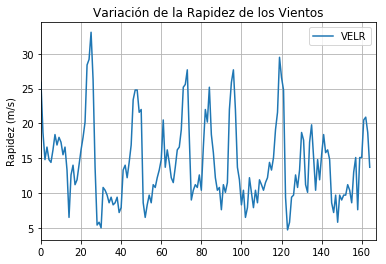

In [16]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELR.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

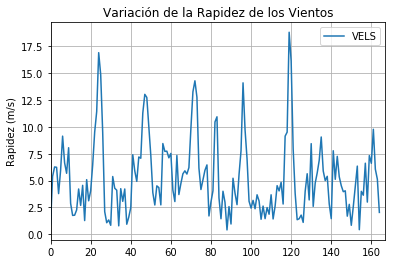

In [17]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

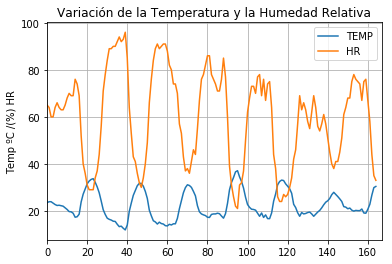

In [18]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

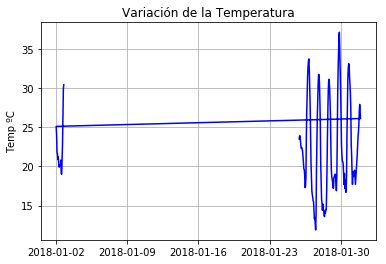

In [19]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

DIRS        160.038554
DIRR        144.200602
VELS          5.285636
VELR         14.347273
TEMP         22.446667
HR           59.993939
PB         1010.161212
PREC          0.000000
RAD-SOL     162.000000
dtype: float64

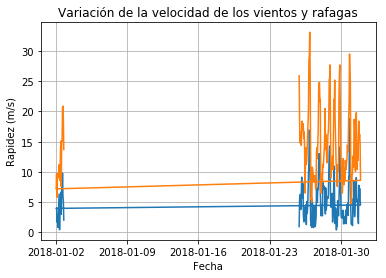

In [29]:
# Gráfica de las velocidades de los vientos en funcion del tiempo
y=df[['VELS', 'VELR']]
x=df['FECHA']
plt.plot(x,y)
plt.title("Variación de la velocidad de los vientos y rafagas")
plt.ylabel("Rapidez (m/s)")
plt.xlabel("Fecha")
plt.grid(True)
plt.show()

In [30]:
#Cambiar el nombre de una columna en los datos
df.rename(columns={'RAD-SOL': 'RADSOL'}, inplace=True)

In [31]:
df.mean()

DIRS       160.038554
DIRR       144.200602
VELS         5.285636
VELR        14.347273
TEMP        22.446667
HR          59.993939
PB        1010.161212
PREC         0.000000
RADSOL     162.000000
dtype: float64

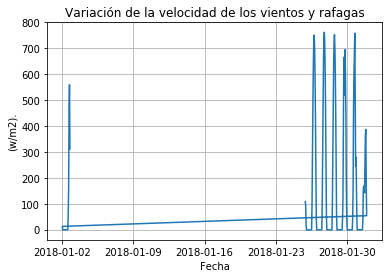

In [36]:
# Gráfica de la radiación solar en función del tiempo
y=df[['RADSOL']]
x=df['FECHA']
plt.plot(x,y)
plt.title("Variación de la velocidad de los vientos y rafagas")
plt.ylabel("(w/m2).")
plt.xlabel("Fecha")
plt.grid(True)
plt.show()

In [34]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,166.000000,166.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0,165.000000
mean,160.038554,144.200602,5.285636,14.347273,22.446667,59.993939,1010.161212,0.0,162.000000
std,107.303216,119.573799,3.509094,5.830790,5.855647,19.709010,1.773710,0.0,245.541393
min,29.000000,2.000000,0.410000,4.700000,11.900000,21.000000,1006.100000,0.0,-1.000000
25%,77.750000,34.000000,2.760000,10.100000,18.500000,42.000000,1009.100000,0.0,-1.000000
50%,142.500000,109.000000,4.520000,13.300000,20.900000,64.000000,1010.100000,0.0,-0.300000
75%,233.750000,245.500000,7.030000,17.300000,27.000000,75.000000,1011.300000,0.0,278.000000
max,1011.400000,424.300000,18.810000,33.100000,37.100000,96.000000,1014.300000,0.0,760.800000


AttributeError: 'DataFrame' object has no attribute 'clear'